In [ ]:
## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Reading the dataset into python environment

In [3]:
train_data=pd.read_csv('/content/train_ctrUa4K.csv')

In [4]:
test_data= pd.read_csv('/content/test_lAUu6dG.csv')

In [ ]:
## Exploratory Data Analysis

In [6]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


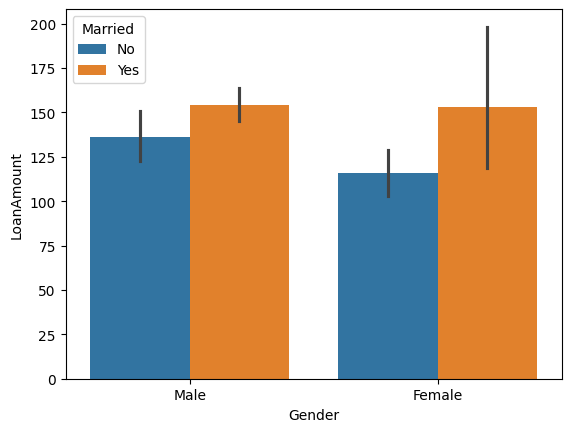

In [10]:
sns.barplot(x=train_data.Gender,y=train_data.LoanAmount,hue=train_data.Married)
plt.show()

In [13]:
df1=train_data['Education'].value_counts()


In [14]:
df1

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [17]:
df1=train_data['Property_Area'].value_counts()
df1

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [18]:
df1=train_data['Self_Employed'].value_counts()
df1

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [ ]:
## Pre-Processing

In [19]:
train_data['Loan_ID'].nunique()

614

In [20]:
test_data['Loan_ID'].nunique()

367

In [21]:
train_data.drop('Loan_ID',axis=1,inplace=True)
test_data.drop('Loan_ID',axis=1,inplace=True)


In [ ]:
## Checking null values

In [22]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
test_data.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [24]:
for i in ['Gender','Married','Dependents','Self_Employed']:
    train_data[i]=train_data[i].fillna(train_data[i].mode()[0])

In [25]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    train_data[i]=train_data[i].fillna(train_data[i].median())


In [ ]:
## Checking outliers

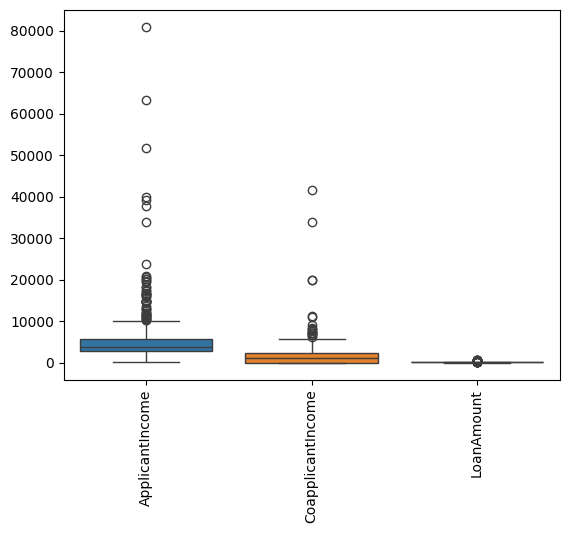

In [26]:
sns.boxplot(train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

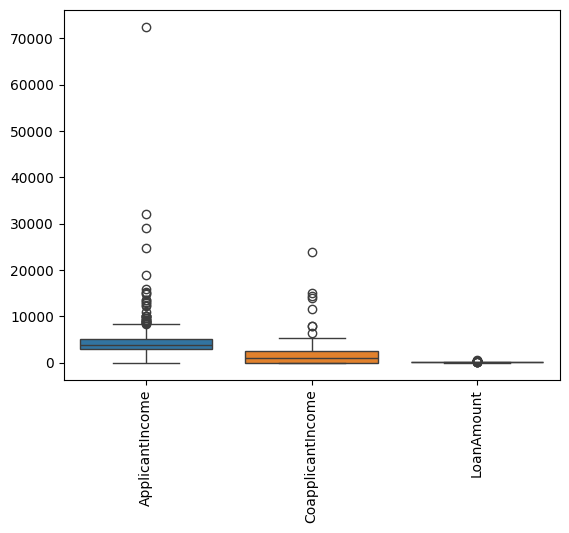

In [27]:
sns.boxplot(test_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

In [28]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    Q1=np.percentile(train_data[i],25,method='midpoint')
    Q3=np.percentile(train_data[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in train_data[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    train_data[i]=train_data[i].clip(lower=low_lim,upper=up_lim)


In [29]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    Q1=np.percentile(test_data[i],25,method='midpoint')
    Q3=np.percentile(test_data[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in test_data[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    test_data[i]=test_data[i].clip(lower=low_lim,upper=up_lim)


<ipython-input-29-3c3ce337f5c4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[i]=test_data[i].clip(lower=low_lim,upper=up_lim)


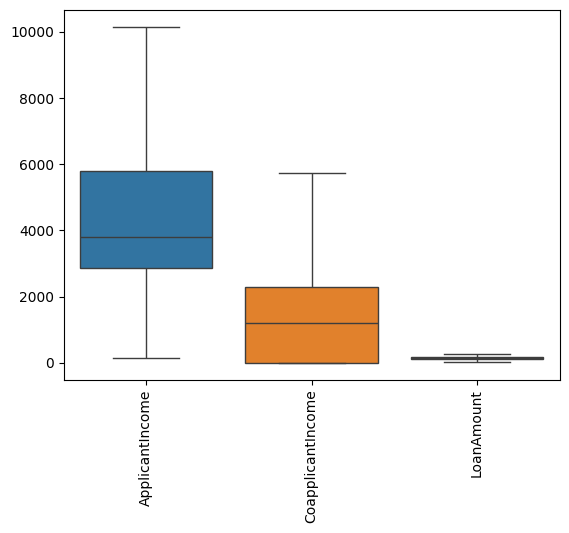

In [30]:
sns.boxplot(train_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

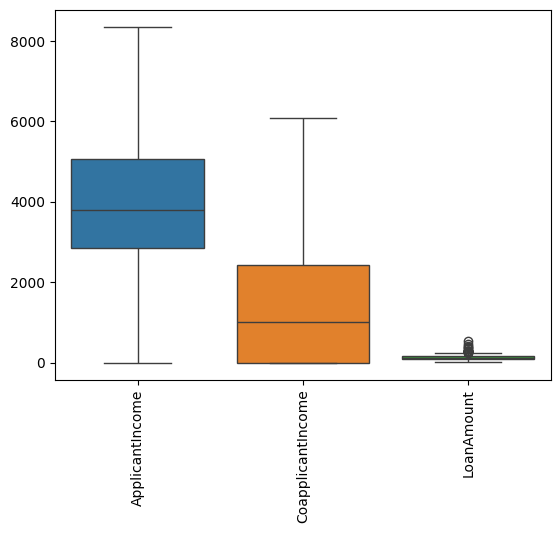

In [31]:
sns.boxplot(test_data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Correlation

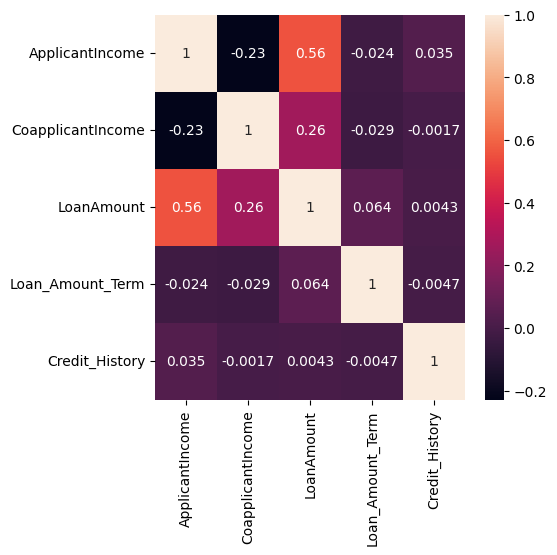

In [32]:
mat=train_data.select_dtypes(['int64','float64']).corr()
plt.subplots(figsize=(5,5))
sns.heatmap(mat,annot=True)
plt.show()

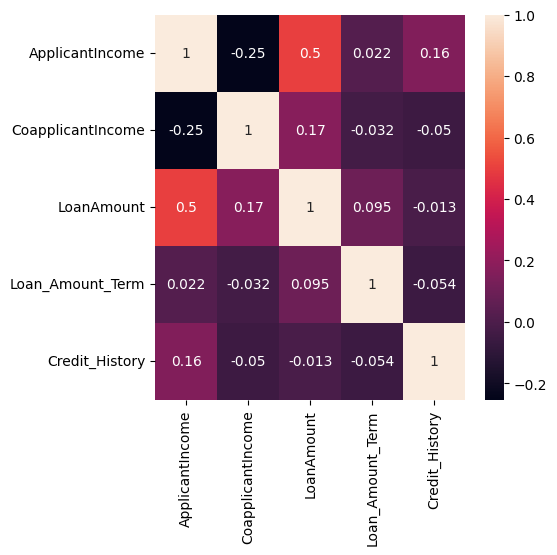

In [33]:
mat=test_data.select_dtypes(['int64','float64']).corr()
plt.subplots(figsize=(5,5))
sns.heatmap(mat,annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()
for i in ['Gender','Married','Dependents','Self_Employed','Education','Property_Area','Loan_Status']:
    train_data[i]=le.fit_transform(train_data[i])

In [37]:
for i in ['Gender','Married','Dependents','Self_Employed','Education','Property_Area']:
    test_data[i]=le.fit_transform(test_data[i])

In [43]:
## train_test_split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x=train_data.drop('Loan_Status',axis=1)
y=train_data['Loan_Status'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)


In [42]:
## MODEL CREATION
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
## Logistic Regression


In [44]:
log_reg=LogisticRegression()
log_reg.fit(x_train_sc,y_train)
log_reg_pred=log_reg.predict(x_train_sc)
print('Accuracy of Logistic Regression', accuracy_score(y_train,log_reg_pred))
print('Precision of Logistic Regression', precision_score(y_train,log_reg_pred))
print('Recall of Logistic Regression:',recall_score(y_train,log_reg_pred))
print('F1 score of Logistic Regression', f1_score(y_train,log_reg_pred))

Accuracy of Logistic Regression 0.814663951120163
Precision of Logistic Regression 0.7980997624703088
Recall of Logistic Regression: 0.9824561403508771
F1 score of Logistic Regression 0.8807339449541285


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## kNN

In [46]:
classifier=KNeighborsClassifier()
classifier.fit(x_train_sc,y_train)
knn_pred=classifier.predict(x_train_sc)
print('Accuracy of KNN Classifier', accuracy_score(y_train,knn_pred))
print('Precision of KNN Classifier', precision_score(y_train,knn_pred))
print('Recall of KNN Classifier:',recall_score(y_train,knn_pred))
print('F1 score of KNN Classifier', f1_score(y_train,knn_pred))



Accuracy of KNN Classifier 0.8289205702647657
Precision of KNN Classifier 0.8208955223880597
Recall of KNN Classifier: 0.9649122807017544
F1 score of KNN Classifier 0.8870967741935484


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
## SVM

In [47]:
sv_clf=SVC()
sv_clf.fit(x_train_sc,y_train)
svm_pred=sv_clf.predict(x_train_sc)
print('Accuracy of SVM Classifier', accuracy_score(y_train,svm_pred))
print('Precision of SVM Classifier', precision_score(y_train,svm_pred))
print('Recall of SVM Classifier:',recall_score(y_train,svm_pred))
print('F1 score of SVM Classifier', f1_score(y_train,svm_pred))

Accuracy of SVM Classifier 0.8289205702647657
Precision of SVM Classifier 0.8115942028985508
Recall of SVM Classifier: 0.9824561403508771
F1 score of SVM Classifier 0.888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
## Decision Tree

In [48]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train_sc,y_train)
dt_pred=dt_clf.predict(x_train_sc)
print('Accuracy of Decision Tree Classifier', accuracy_score(y_train,dt_pred))
print('Precision of Decision Tree Classifier', precision_score(y_train,dt_pred))
print('Recall of Decision Tree Classifier:',recall_score(y_train,dt_pred))
print('F1 score of Decision Tree Classifier', f1_score(y_train,dt_pred))

Accuracy of Decision Tree Classifier 0.9979633401221996
Precision of Decision Tree Classifier 1.0
Recall of Decision Tree Classifier: 0.9970760233918129
F1 score of Decision Tree Classifier 0.9985358711566619


In [ ]:
## Random Forest

In [49]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train_sc,y_train)
rf_pred=rf_clf.predict(x_train_sc)
print('Accuracy of Random Forest Classifier', accuracy_score(y_train,rf_pred))
print('Precision of Random Forest Classifier', precision_score(y_train,rf_pred))
print('Recall of Random Forest Classifier:',recall_score(y_train,rf_pred))
print('F1 score of Random Forest Classifier', f1_score(y_train,rf_pred))

<ipython-input-49-6cc37d97012b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train_sc,y_train)


Accuracy of Random Forest Classifier 0.9979633401221996
Precision of Random Forest Classifier 0.9970845481049563
Recall of Random Forest Classifier: 1.0
F1 score of Random Forest Classifier 0.9985401459854015
